# MOD 1 Final Project Submission

Please fill out:
* Student name: Bryan DiCarlo
* Student pace: Full Time Online 4/15/19 Cohort
* Scheduled project review date/time: ?
* Instructor name: Rafael Carrasco
* Blog post URL:


# Introduction

We will be investigating a publicly available data set containing house sale prices in King County in Washington State. This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.  Our goal is to develop a predictive model to effectively predict sale price from the housing features contained in the data set.  In line with this objective, we intend to formulate answers to some important questions that drive this investigation.  What housing features provide the most accurate prediction of sale price?  What is the most effective method of modeling the predicted sale price? Can we produce a reliable and unbiased model for the prediction of house sale price?  Our business goal is to produce a reliable model for the prediction of sale that will be useful for all parties involved. A tool that will be equally useful for a homeowner trying to estimate the value of their property, a buyer seeking to estimate fair market value for properties in this area as well as sales agents looking to list houses in this area. Real estate prices, like in many industries, rise and and fall depending on market pressures. Our goal is to produce a predictive tool for estimating the price value of a property that can be considered fair and unbiased.  A tool that would ultimately be useful for a buyer, seller, agent or investor.

# Methodology

We will follow the standard OSEMN framework in our investigation.  Our data is a publicly available data set from Kaggle as described above.  We will first inspect the data set to identify any missing or erroneous data.  Missing values will be replaced by acceptable imputed values where appropriate or dropped from the analysis if determined to be inconsequential to our model.  The variables and data to be used for price prediction will then be explored.  In this step we will determine the variables best suited to include in our model.  We will use both visual and numerical techniques to investigate distribution, statistical properties and suitability for predicting our target variable, sale price.  Normalization and standardization methods will be employed where appropriate to strengthen our model.  We will be using a Multiple Linear Regression (MLR) model in our analysis. We will use an iterative approach to determine the combination features which lead to the most robust model.  Each step will be documented along the way.  In the end we will evaluate the effectiveness and reliability of the model we build.

# Description of the Data

## Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **date** - house was sold
* **price** -  is prediction target
* **bedrooms** -  of Bedrooms/House
* **bathrooms** -  of bathrooms/bedrooms
* **sqft_living** -  footage of the home
* **sqft_lot** -  footage of the lot
* **floors** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


# Outline and Objectives
* Obtain Data
* Inspect and clean data where appropriate for modeling purposes
* Evaluate the predictive features of the Data Set. Identify the most effective predictors of price.  Modify, if necessary, any   features to fit the assumptions of our MLR model 
* We would expect location and size of the house to be important features in our model
* Determine the best features of the data set repreenting size and location that can be used in our model
* Model the Data using the MLR technique to predict price form the features contained in the data set.  Analyze and evaluate     our results.  Use this information to refine and improve our model
* Analyze and interpret the results of our final model
* Discussion
* Summary

# Obtain the Data Set

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('kc_house_data.csv') #Import the data set and read into a pandas data frame
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


# Cleaning or Scrubbing the Data Set
* Questions to be adressed:
* Indentify missing data
* Determine the best method for handling the misssing data
* Inspect the data type of each column as that will be important. 
* transform data to data types suitable for MLR (int and float) where necessary and possible

In [5]:
df.info() # get the meta information from our data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [6]:
df.isnull().sum() # get the counts for missing values in each column

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

### From this initial inspection we can see 6 potential areas that need to be addressed 
* id and date will not be needed in our analysis and can be dropped
* waterfront, view, and yr_renovated all have missing values.  After further investigation we will determine the most        appropriate methods for replacing or eliminating these values
* sqft_basement is type object. It contains numerical values and should be cast to type float

In [7]:
df.drop(['id','date'], axis=1, inplace=True) # drop id and date as they will not be needed in our model

In [8]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


### Investigate the waterfront column there are 2376 missing values

In [9]:
df.waterfront.value_counts(normalize=True) # relative counts of each value present

0.0    0.992404
1.0    0.007596
Name: waterfront, dtype: float64

### The values for waterfront are either 0 or 1.  99.2% of all waterfront values are 0.  It makes the most sense to replace missing values with 0.  Rather than making a guess about waterfront location when the chances are extremely small it will be a value other than 0.


In [10]:
df.waterfront.fillna(0, inplace=True) # fill the missing values with 0

In [11]:
df.waterfront.value_counts(normalize=True) # relative counts after replacement gives us roughly the same proportions

0.0    0.99324
1.0    0.00676
Name: waterfront, dtype: float64

### Now lets investigate the yr_renovated column there are 3842 missing values

In [12]:
df.yr_renovated.value_counts(normalize=True) # relative counts of each value present

0.0       0.958096
2014.0    0.004112
2003.0    0.001746
2013.0    0.001746
2007.0    0.001690
2000.0    0.001633
2005.0    0.001633
1990.0    0.001239
2004.0    0.001239
2009.0    0.001183
1989.0    0.001126
2006.0    0.001126
2002.0    0.000957
1991.0    0.000901
1998.0    0.000901
1984.0    0.000901
1999.0    0.000845
2008.0    0.000845
2010.0    0.000845
2001.0    0.000845
1983.0    0.000845
2015.0    0.000789
1985.0    0.000789
1986.0    0.000789
1987.0    0.000789
1994.0    0.000789
1992.0    0.000732
1993.0    0.000676
1997.0    0.000676
1995.0    0.000676
            ...   
1975.0    0.000282
1964.0    0.000282
1969.0    0.000225
1963.0    0.000225
1973.0    0.000225
1981.0    0.000225
1965.0    0.000225
1978.0    0.000169
1960.0    0.000169
1958.0    0.000169
1956.0    0.000169
1955.0    0.000169
1945.0    0.000169
1972.0    0.000169
1967.0    0.000113
1957.0    0.000113
1940.0    0.000113
1974.0    0.000113
1962.0    0.000113
1953.0    0.000056
1950.0    0.000056
1934.0    0.

#### 96% of all properties have a yr_renovated value of 0.  It also makes the most sense to replace missing values with the clearly most likely outcome rather than guessing when and if a house has been renovated

In [13]:
df.yr_renovated.fillna(0, inplace=True) # fill the missing values with 0

In [14]:
df.yr_renovated.value_counts(normalize=True) # relative counts after replacement again give roughly the same proportions

0.0       0.965551
2014.0    0.003380
2003.0    0.001435
2013.0    0.001435
2007.0    0.001389
2000.0    0.001343
2005.0    0.001343
1990.0    0.001019
2004.0    0.001019
2009.0    0.000972
1989.0    0.000926
2006.0    0.000926
2002.0    0.000787
1991.0    0.000741
1998.0    0.000741
1984.0    0.000741
1999.0    0.000695
2008.0    0.000695
2010.0    0.000695
2001.0    0.000695
1983.0    0.000695
2015.0    0.000648
1985.0    0.000648
1986.0    0.000648
1987.0    0.000648
1994.0    0.000648
1992.0    0.000602
1993.0    0.000556
1997.0    0.000556
1995.0    0.000556
            ...   
1975.0    0.000232
1964.0    0.000232
1969.0    0.000185
1963.0    0.000185
1973.0    0.000185
1981.0    0.000185
1965.0    0.000185
1978.0    0.000139
1960.0    0.000139
1958.0    0.000139
1956.0    0.000139
1955.0    0.000139
1945.0    0.000139
1972.0    0.000139
1967.0    0.000093
1957.0    0.000093
1940.0    0.000093
1974.0    0.000093
1962.0    0.000093
1953.0    0.000046
1950.0    0.000046
1934.0    0.

### Now lets investigate the view column there are 63 missing values

In [15]:
df.view.value_counts(normalize=True) # Relative counts of each value

0.0    0.901923
2.0    0.044441
3.0    0.023591
1.0    0.015325
4.0    0.014721
Name: view, dtype: float64

#### Once again, after inspection it makes the most sense to replace the missing view values with 0.  We are only missing 63 values (0.3% of the total). Overall 90% of all values are 0. It makes sense to replace these values with 0

In [16]:
df.view.fillna(0, inplace=True) # fill the missing values with 0

In [17]:
df.view.value_counts(normalize=True) # Again we can see that our replacement did not affect the relative counts

0.0    0.902209
2.0    0.044312
3.0    0.023522
1.0    0.015280
4.0    0.014678
Name: view, dtype: float64

In [18]:
df.isnull().sum() # we can see that we have sucessfully eliminated the missing values

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### Now to deal with the sqft_basement column. This value should be a float but something is holding us up. lets look at this column

In [19]:
df.sqft_basement.value_counts() # we see that there is a place holder "?" more than half of all values are 0

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
300.0       142
900.0       142
200.0       105
750.0       104
480.0       103
450.0       103
530.0       103
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
860.0        79
670.0        78
1100.0       78
780.0        76
550.0        76
650.0        75
240.0        74
380.0        73
680.0        73
360.0        72
          ...  
2400.0        1
518.0         1
915.0         1
2390.0        1
906.0         1
2310.0        1
1548.0        1
1284.0        1
1024.0        1
1960.0        1
666.0         1
2600.0        1
20.0          1
374.0         1
862.0         1
207.0         1
1913.0        1
243.0         1
176.0         1
2196.0        1
1245.0        1
4130.0        1
792.0         1
2580.0        1
602.0         1
415.0         1
1008.0        1
283.0         1
3000.0        1
274.0         1
Name: sqft_basement, Len

### we can see that there is a "?" place holder.  We will remove this and replace with zero.  The missing values are small compared to the data set (2%). And again 0 is clearly the most predominant value. I feel is it better to err on the side of caution.  I feel this replacement is warranted. We then cast the entire column to a float.

In [20]:
df.sqft_basement.replace(to_replace='?', value=0, inplace=True) #remove "?" and replace with 0

In [21]:
df.sqft_basement = df.sqft_basement.astype('float') # Convert this column from object to float


In [22]:
# again we can see after replacement the relative numbers are virtually unchanged
df.sqft_basement.value_counts()

0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
900.0       142
300.0       142
200.0       105
750.0       104
450.0       103
530.0       103
480.0       103
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
860.0        79
670.0        78
1100.0       78
780.0        76
550.0        76
650.0        75
240.0        74
680.0        73
380.0        73
850.0        72
360.0        72
          ...  
2600.0        1
2610.0        1
276.0         1
274.0         1
1245.0        1
143.0         1
266.0         1
862.0         1
2180.0        1
415.0         1
243.0         1
1135.0        1
1525.0        1
3000.0        1
172.0         1
225.0         1
518.0         1
935.0         1
1920.0        1
1930.0        1
1990.0        1
588.0         1
1548.0        1
2390.0        1
602.0         1
915.0         1
295.0         1
1281.0        1
2130.0        1
906.0         1
Name: sqft_basement, Len

In [23]:
df.info() # Our data now looks like it is in a form more appropriate for MLR analysis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(9), int64(10)
memory usage: 3.1 MB


In [24]:
df.to_csv('kc_house_data_clean.csv', index=False) #save our cleaned data in a new .csv file

### Nice it looks like our Data is now ready to explore

# Exploratory Data Analysis
* Questions to be addressed in our EDA
* We expect size and location to be important in our model
* which features of our model will be the best representations of size and location and fit the parameters of our model
* Which feature variables or predictors have the highest degree of lnear relationship with price
* We need to investigate the distributions of predictor variables and the target. The closer our predictors and target variable are to normally distributed, the better our model will perform
* We need to check for the presence of multicolinearity.  If any of the features we use to predict price are highly correlated with themselves, as well as the target variable, this will hinder the interpretation of our model.  The information is redundant and will affect the model.  If this relationship is present we should decide on droping highly self correlated predictors or combining them into one variable.
* Choose the most appropriate variables to include in the first iteration of our model
* We can employ visualizations such as histograms, scatter plots, correlation matrix and numerical measures such as skewness and kurtosis in our evaluation
* These techniques will will help us decide which features to include in our model as well as determining if we need to take measures to pre-process the data. i.e. standardizarion and normalization techniques

In [25]:
import scipy.stats as stats

### Lets first look at the linear correlations between our price target and the predictive features of the data set

In [26]:
df.corr()['price'].sort_values(ascending=False) #ranked correlation between price and features

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.393497
sqft_basement    0.321108
bedrooms         0.308787
lat              0.306692
waterfront       0.264306
floors           0.256804
yr_renovated     0.117855
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
zipcode         -0.053402
Name: price, dtype: float64

### It makes sense to eliminate the features with a price correlation below 0.1.  This suggests that these features have very little linear correlation with price and will not be robust predictors of price.  It is a good place to start. It will make our dataframe more manageable for further exploration. And we can always come back and re-introduce these features if needed later in our model

In [27]:
df.columns # identifying the column names

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [28]:
# Creating a new data frame that have a correlation with price > 0.1
df2 = df.loc[:, ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated']] 

In [29]:
df2.columns # Our new columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated'],
      dtype='object')

### Lets get a view of our data and explore some of the relationships between variables we are trying to identify

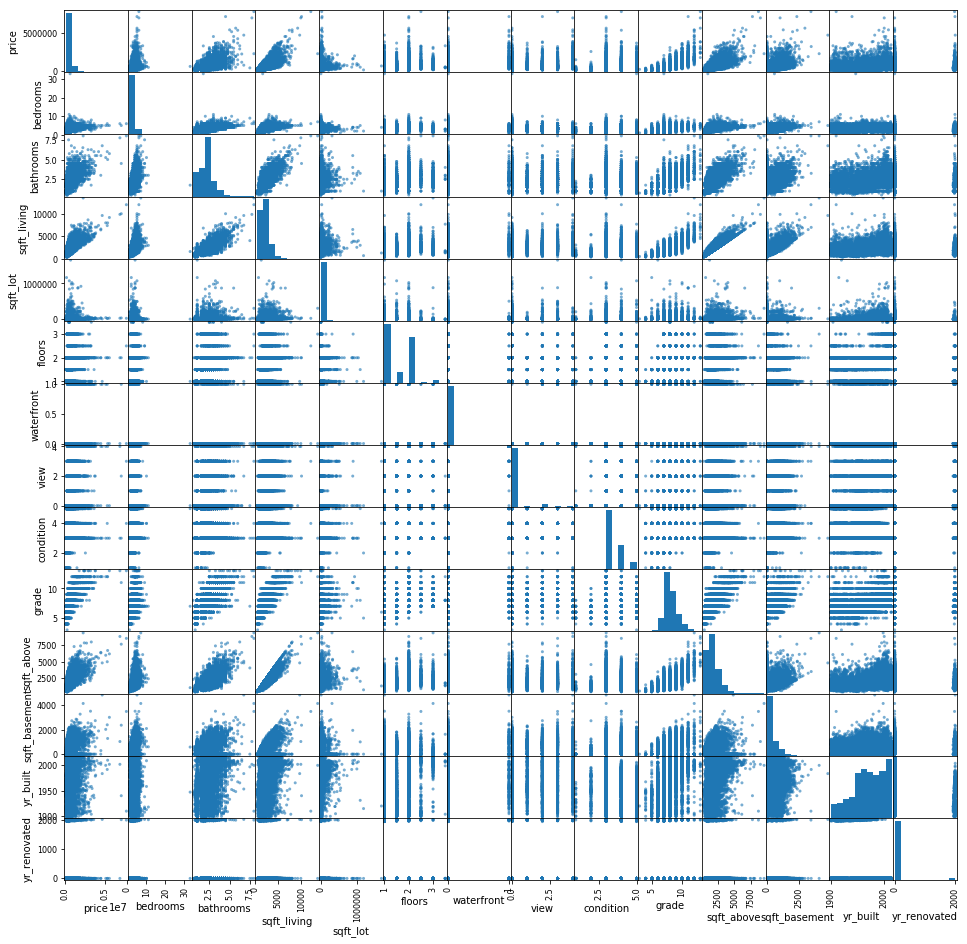

In [30]:
# We can use scatter matrix functionality to view our data

pd.plotting.scatter_matrix(df2, figsize=(16, 16), diagonal='hist', alpha=0.6)
plt.show()

## That is a lot of information but it suggests that the features with the highest correlation values with price also have a linear association with price in the scatter plots.  The histograms along the diagonal also indicate several skewed distributions, including price itself, that can be helped with log transformations

###  Before Transformation

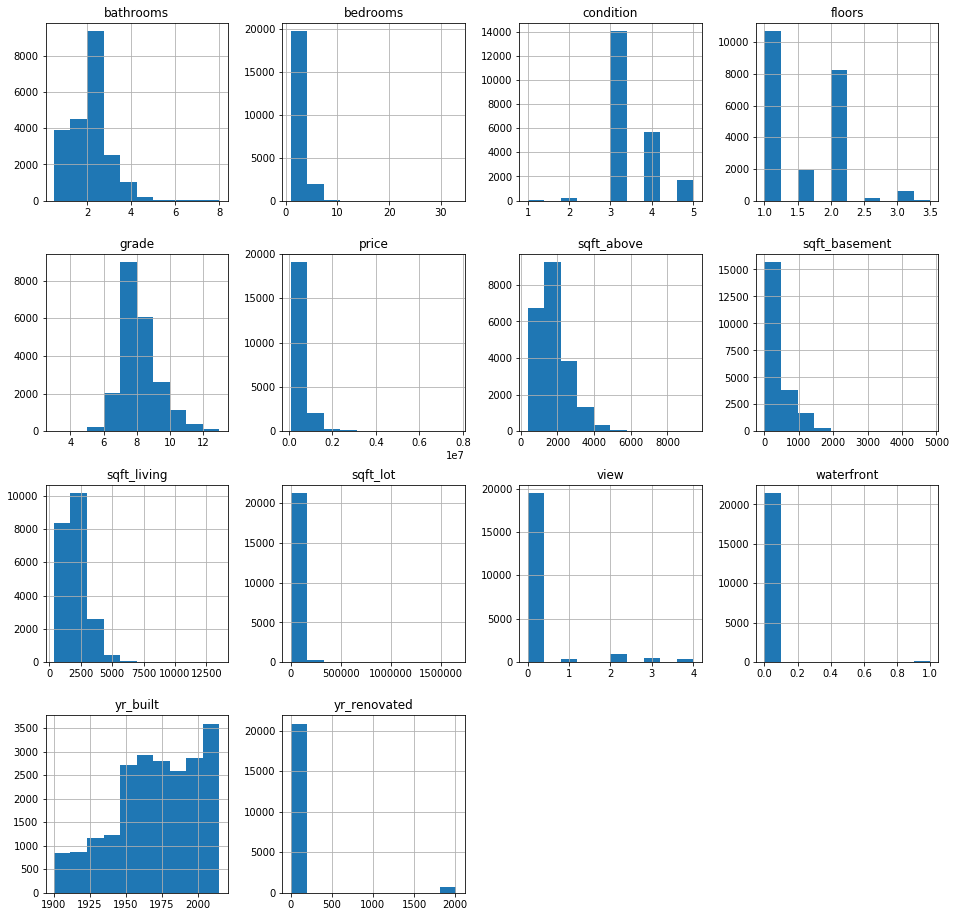

In [31]:
df2.hist(figsize=(16,16)) # plot the histograms of our features and target
plt.show()

### It looks like ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_above', 'yr_built' ] are all skewed and might be helped through log transformation.  Lets look at some numerical values related to a normal distribution (skewness, kurtosis, Jarque Bera) before and after transformation to see if this helps.

### Stastistics describing Normality before transformation

In [32]:
### Check the skewness and kurtosis of each these columns before transformation
for column in ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_above','yr_built' ]:
    x = df2[column]
    skew = stats.skew(x)
    kurt = stats.kurtosis(x, fisher=False)
    jb = stats.jarque_bera(x)
    print(column)
    print("-"*50)
    print("skew = {}\nkurt = {}\njb={}\n".format(skew, kurt, jb[0]))

price
--------------------------------------------------
skew = 4.023085207745834
kurt = 37.53308449607733
jb=1131390.1455036185

bedrooms
--------------------------------------------------
skew = 2.0235006824707016
kurt = 52.81002325740027
jb=2247362.7961759153

bathrooms
--------------------------------------------------
skew = 0.5196731850083088
kurt = 4.278741330738532
jb=2443.538813491628

sqft_living
--------------------------------------------------
skew = 1.4731131326116373
kurt = 8.25060829294523
jb=32619.691844571556

sqft_above
--------------------------------------------------
skew = 1.4473337032172715
kurt = 6.40445358442112
jb=17969.967066666766

yr_built
--------------------------------------------------
skew = -0.46941737064461614
kurt = 2.342180026029707
jb=1182.5597434216056



## After Log transformation of the identified columns

In [33]:
# log transform these columns
for column in ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_above','yr_built' ]:
    df2[column] = np.log(df2[column])

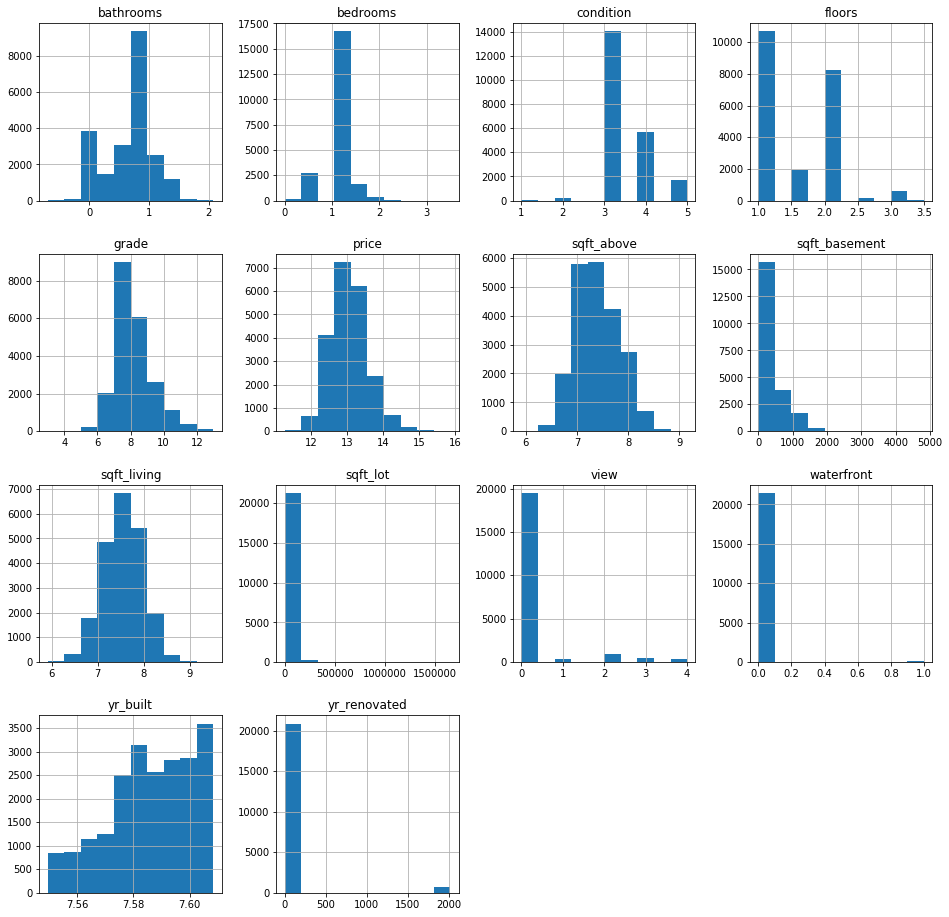

In [34]:
df2.hist(figsize=(16,16)) # plot the histograms of our features and target
plt.show()

### It looks like we helped the distribution of the columns that we could with this transformation.  Lets recheck the numbers and compare

### Stastistics describing Normality after Log transformation of the identified columns

In [35]:
# Check the skewness and kurtosis of each these columns
for column in ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_above','yr_built' ]:
    x = df2[column]
    skew = stats.skew(x)
    kurt = stats.kurtosis(x, fisher=False)
    jb = stats.jarque_bera(x)
    print(column)
    print("-"*50)
    print("skew = {}\nkurt = {}\njb={}\n".format(skew, kurt, jb[0]))

price
--------------------------------------------------
skew = 0.43097424174908705
kurt = 3.690610735626765
jb=1097.756051433923

bedrooms
--------------------------------------------------
skew = -0.6805164592186601
kurt = 5.051100060907309
jb=5452.722430673464

bathrooms
--------------------------------------------------
skew = -0.4932349556333316
kurt = 2.536021932513068
jb=1069.4101298324124

sqft_living
--------------------------------------------------
skew = -0.027360069339449705
kurt = 2.9207022466431365
jb=8.353024234627487

sqft_above
--------------------------------------------------
skew = 0.2596808910296365
kurt = 2.6658615952970295
jb=343.1989476033368

yr_built
--------------------------------------------------
skew = -0.49472545504608884
kurt = 2.377103205990206
jb=1230.1412908329921



### It looks like this enhanced our data.  Making it more suitable for the MLR modleing that we will employ.  The Most notable enhancement was for the target variable itself.  Lets take a visual look at this improvement before and after this transformation

### I will plot  the histogram of our target variable, price, before and after log transformation.  I will also use the probability plot. This will plot the probability plot of  the sample data against the quantiles of the theoretical normal distribution.  Deviations of your plot fom the theorectical plot indicate the distribution deviates from normality.  We should see that after transformation our plot of price follows the normal distribution much more closely.

## Price before transformation

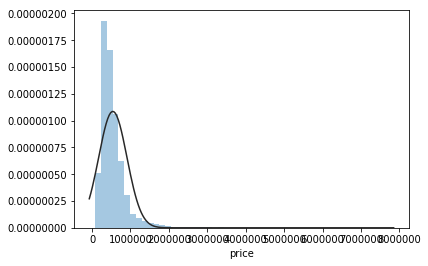

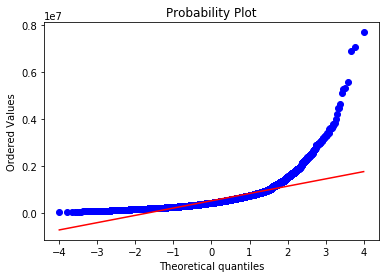

In [36]:
from scipy.stats import norm
from scipy import stats

# histogram and normal probability plot of price before transformation

sns.distplot(df['price'], fit=norm, bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(df['price'], plot=plt)

## Price After transformation

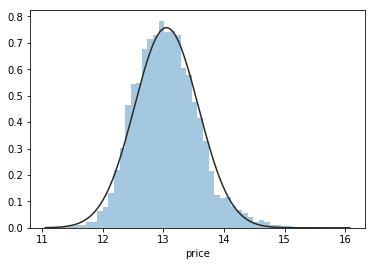

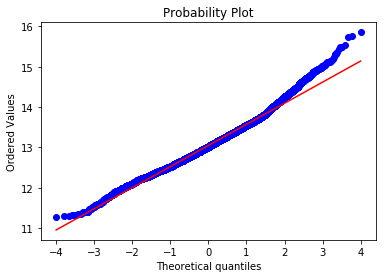

In [37]:
# histogram and normal probability plot

sns.distplot(df2['price'], fit=norm, bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(df2['price'], plot=plt)

I will not plot each of the transformed variables. But as can be seen in the before and after statistics describing normality, the results will be similar.  

## Identification of Correlation and Multicolinearity with a correlation matrix

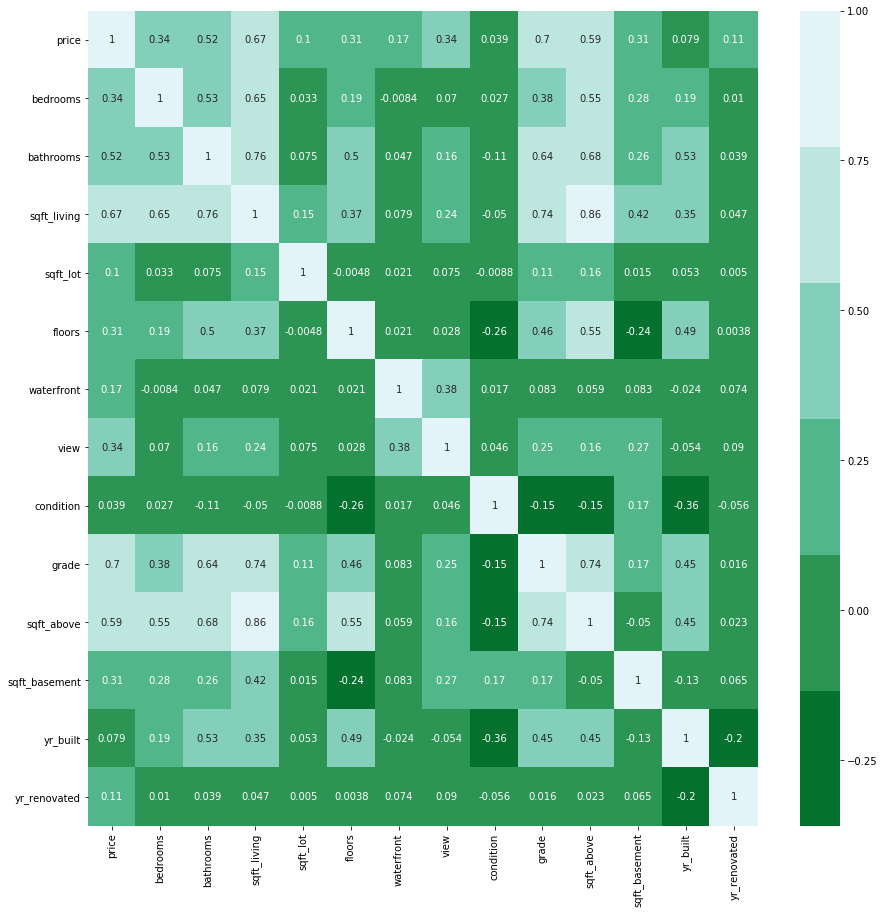

In [38]:
# Correlattion matrix plot of our data containing Identified important predictors and the features we log transformed
corr = df2.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True, fmt='0.2g', cmap=sns.color_palette("BuGn_r"))
plt.show()

### The most glaring example of multicolinearity exist between sqft_living and sqft_ above.  Which have a correlation coefficient of 0.86.  Grade is also highly correlated with each of these two variables. I will also feature engineer a new bed_bath combined column to see if this will be useful in our Model.  I have also added Lat back to our data.  One would think location would be hugely important in real estate.  However in the form our data is in zipcode does not provide much useful information.  Neither does longitude.  Lat has a correlation value of 0.31.  Perhaps it will be a useful indicator of location in our model

### One approach to deal with this this is to add the two colums together and create a new column

In [39]:
# I will do this in a weighted fashion.  The corr of sqft_living with price is 0.67 and 0.59 for sqft_above
# I will give slightly higher weight to sqft_living (0.6) and (0.4) for sqft_above
# With the same reasoning I will give bathrooms a higher weight than bedrooms.  The corr for bathrooms is 0.52 and 
# 0.35 for bedrooms

df2['sqft_comb'] = 0.6*df2.sqft_living + 0.4*df2.sqft_above
df2['bed_bath'] = 0.7*df2.bathrooms + 0.3*df2.bedrooms
df2['lat'] = df.lat

In [40]:
df2.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_comb,bed_bath,lat
0,12.309982,1.098612,0.000000,7.073270,5650,1.0,0.0,0.0,3,7,7.073270,0.0,7.578145,0.0,7.073270,0.329584,47.5112
1,13.195614,1.098612,0.810930,7.851661,7242,2.0,0.0,0.0,3,7,7.682482,400.0,7.576097,1991.0,7.783990,0.897235,47.7210
2,12.100712,0.693147,0.000000,6.646391,10000,1.0,0.0,0.0,3,6,6.646391,0.0,7.566828,0.0,6.646391,0.207944,47.7379
3,13.311329,1.386294,1.098612,7.580700,5000,1.0,0.0,0.0,5,7,6.956545,910.0,7.583248,0.0,7.331038,1.184917,47.5208
4,13.142166,1.098612,0.693147,7.426549,8080,1.0,0.0,0.0,3,8,7.426549,0.0,7.594381,0.0,7.426549,0.814787,47.6168


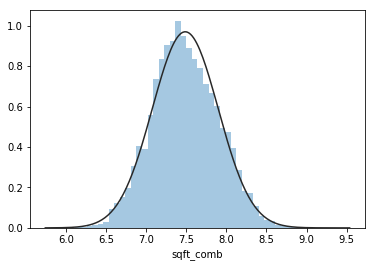

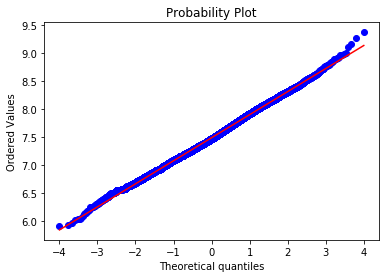

In [41]:
# just to recheck the distribution of this combined column
# histogram and normal probability plot

sns.distplot(df2['sqft_comb'], fit=norm, bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(df2['sqft_comb'], plot=plt)


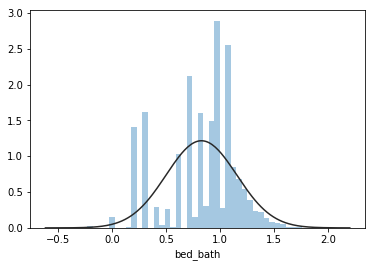

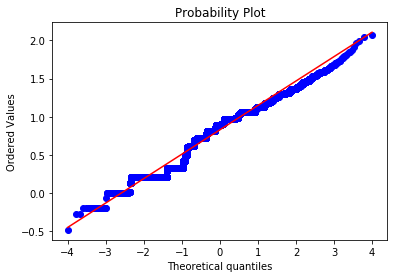

In [42]:
# just to recheck the distribution of this combined column
# histogram and normal probability plot

sns.distplot(df2['bed_bath'], fit=norm, bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(df2['bed_bath'], plot=plt)

## Great our combination of cloumns did not affect our distibution

## Lets now look at the scatter plots of our features against price.  The plots will be fitted with a regression line. We will be looking for plots with postive trending regression lines.

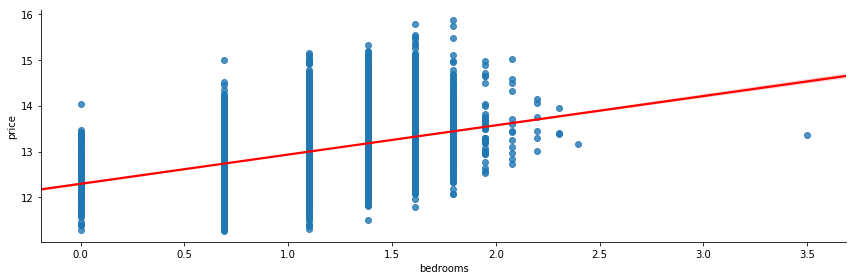

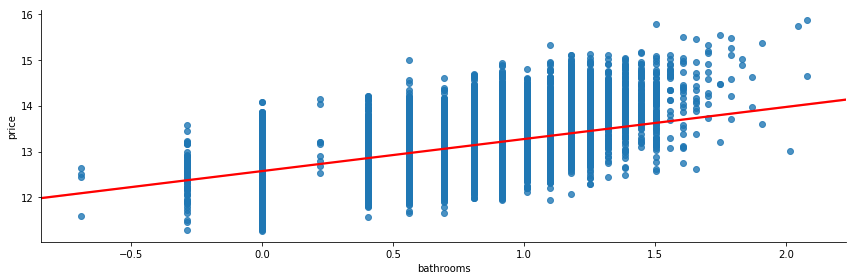

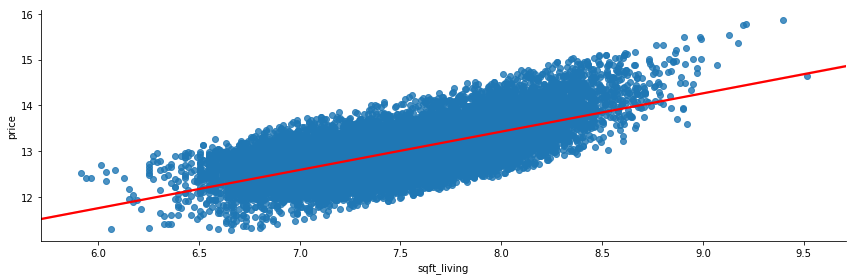

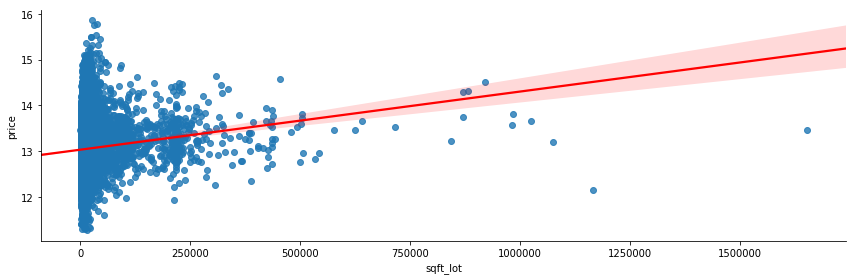

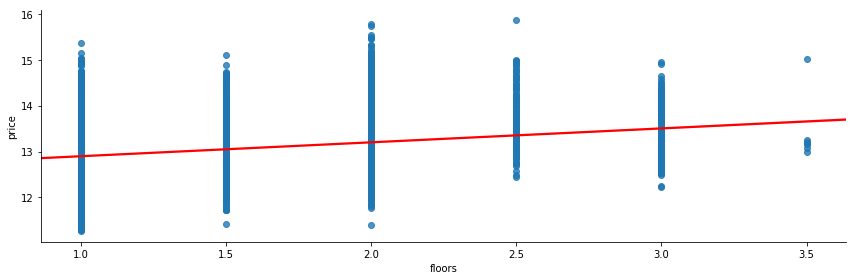

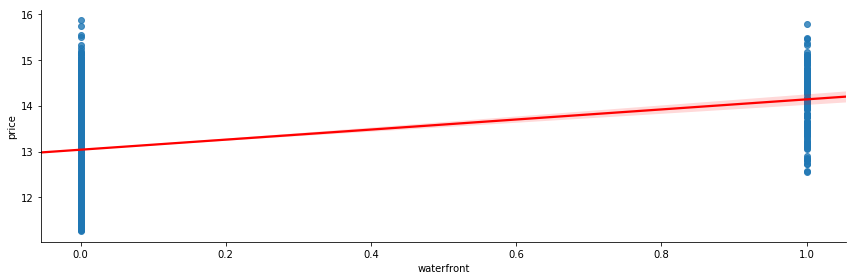

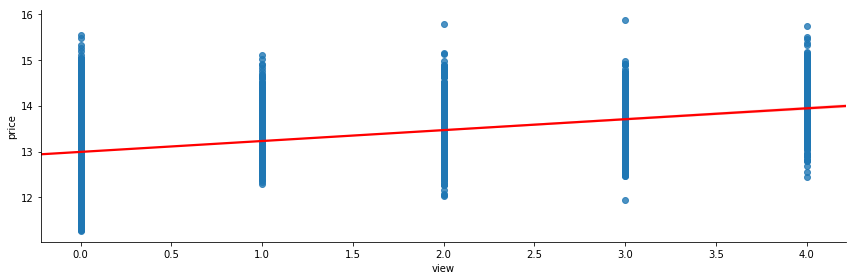

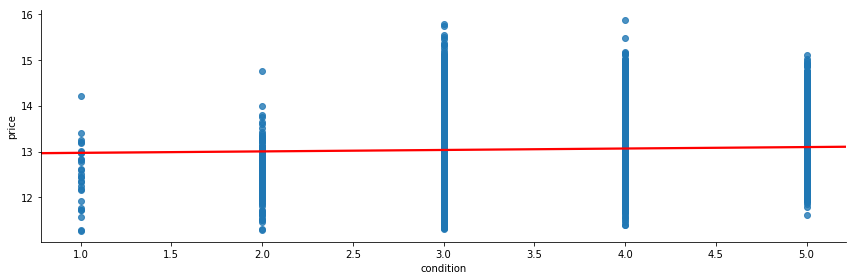

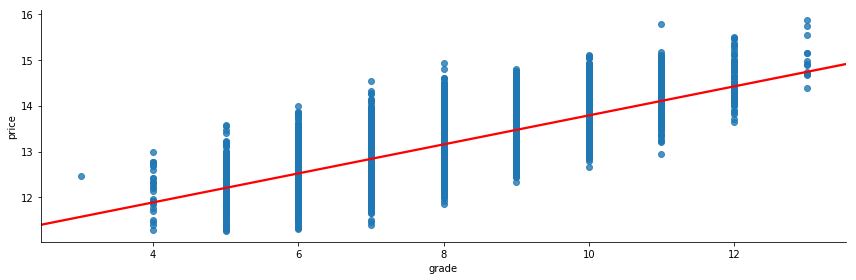

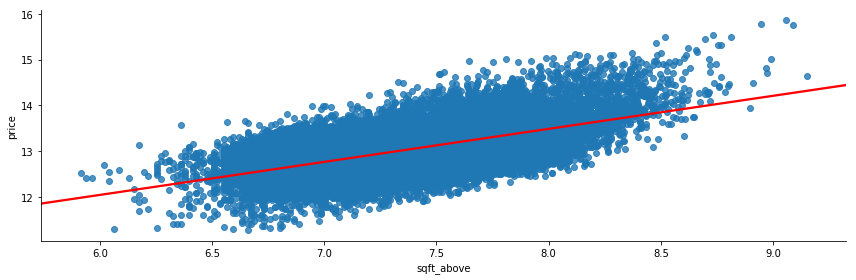

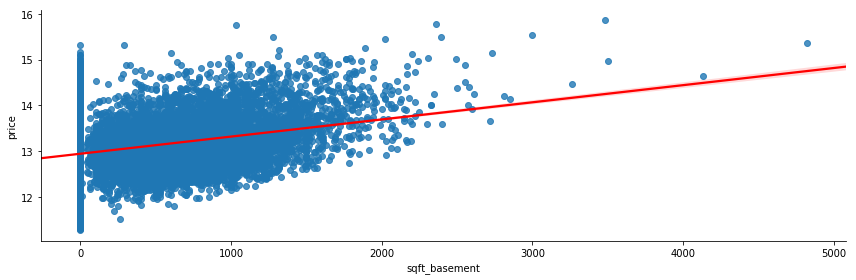

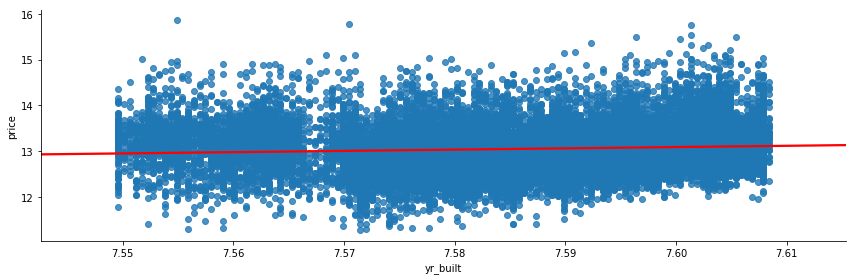

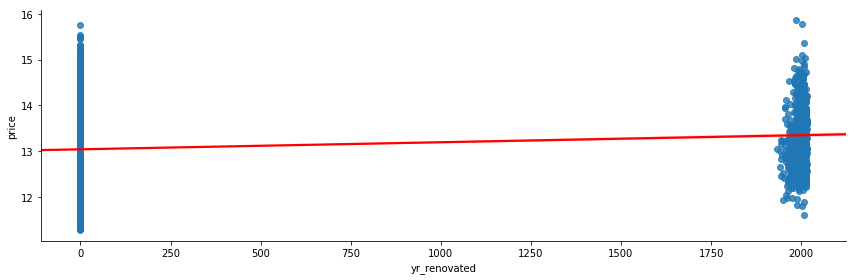

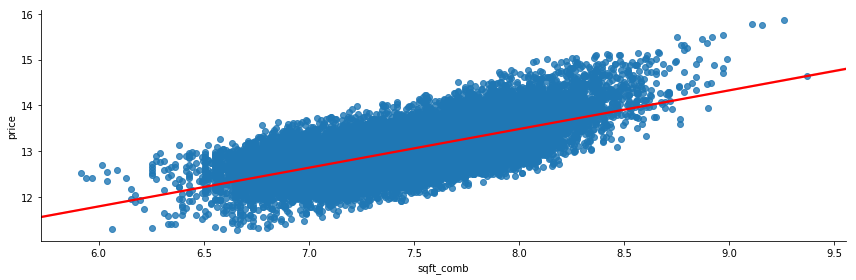

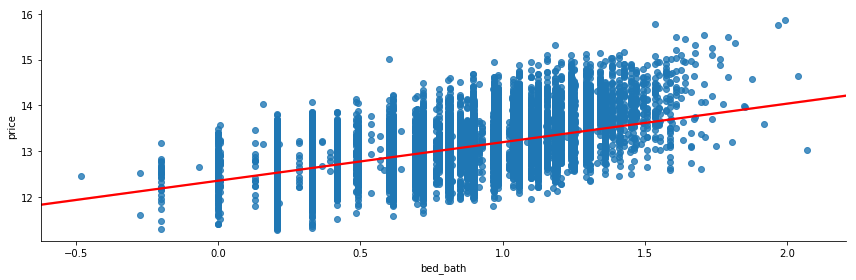

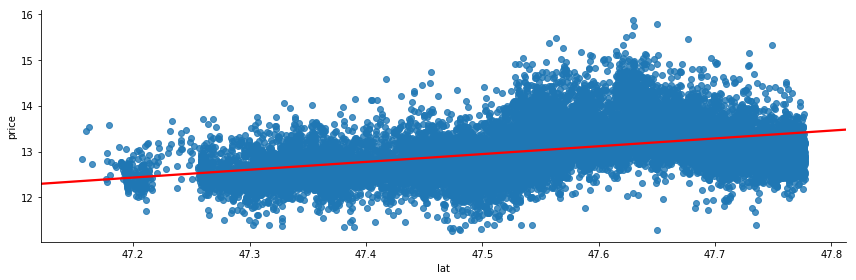

In [67]:
# Plotting our most promising features against price with trend line or regression line.  We will be looking for features
# with positive trending lines. We would like to see increasing values of price as the value of our feature increases
# Any features with horizontal regression lines will not be useful in our model and can be eliminated

for column in ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_comb','bed_bath', 'lat']:
    sns.lmplot(x=column, y='price', data=df2, height=4, aspect=3, line_kws={'color':'red'})

## We can see from this analysis that condition, yr_built, and yr_renovated are very flat and will not add useful information to our model.  We will eliminate these features when we begin modeling.

In [44]:
# lets check our correlation ranks once more before begining our modeling process
# I have included condition, yr_built and yr_renovated
# This confirms that these three features have very little correlation with price and should be eliminated in our model

df2.corr()['price'].sort_values(ascending=False) #ranked correlation between price and features

price            1.000000
grade            0.703720
sqft_living      0.674802
sqft_comb        0.660945
sqft_above       0.586013
bed_bath         0.524492
bathrooms        0.520278
lat              0.448837
view             0.344653
bedrooms         0.342850
sqft_basement    0.313119
floors           0.310630
waterfront       0.170720
yr_renovated     0.106867
sqft_lot         0.100025
yr_built         0.078987
condition        0.038918
Name: price, dtype: float64

## Re-examine our correlation matrix with condition, yr_built and yr_renovated removed

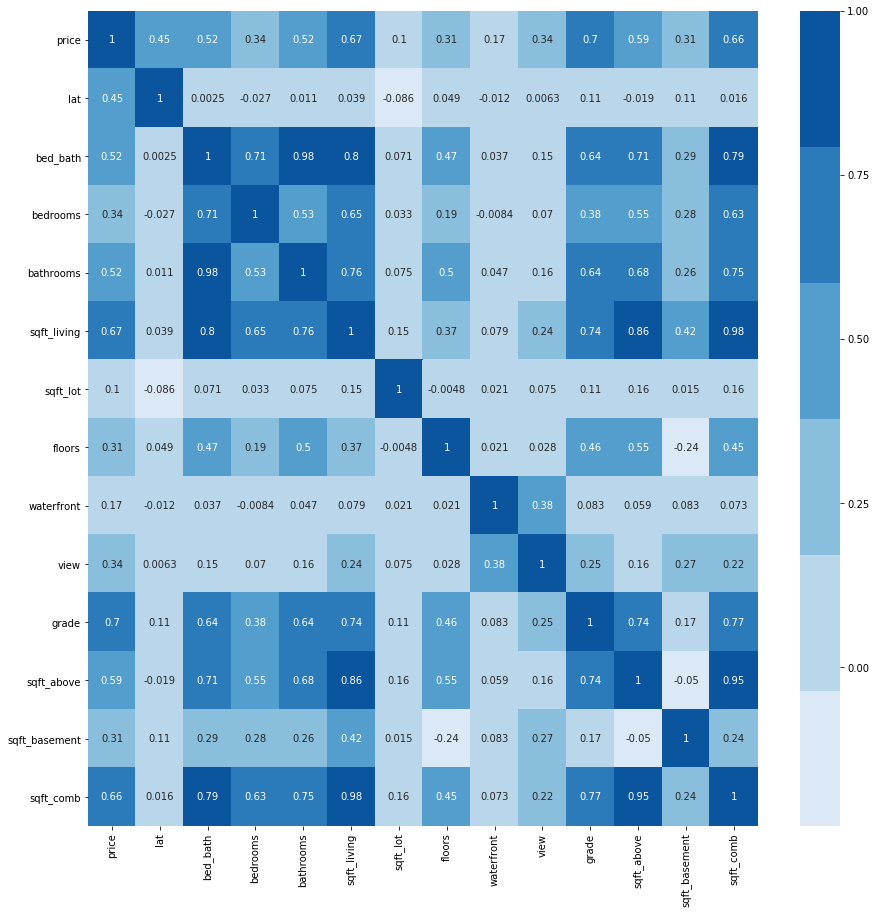

In [45]:
# Correlattion matrix plot of our data containing Identified important predictors and the features we log transformed

corr = df2[['price','lat','bed_bath','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','grade','sqft_above','sqft_basement','sqft_comb']].corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True, fmt='0.2g', cmap=sns.color_palette("Blues"))
plt.show()

## It looks like we are ready to begin our modeling process. 
* We have identified the predictors most likely to have the highest predictive power. 
* We eliminated three features, by visual analysis, that will not add to our model.  
* We have transformed our data where possible to better fit the assumptions of our model.  
* We have identified instances of multicolinearity and have taken steps to minimize this effect.
* we have feature engineered two combined columns bed_bath and sqft_comb to help eliminate redundancy
* We can test all 3 but will likely be limited to using only one of the variables: sqft_above, sqft_living or the combined column feature sqft_comb. These are our best predictors of size.  which we know will be important
* We have added back the lat column.  We know location will be important to predicting price of real estate.  This is our best predictor of location. Zipcode and longitude are not helpful in their current form even though certain zipcodes can be seen to have higher house prices.

# Modeling using Multiple Linear Regression with Ordinary Least Squares Fit
* Objective: to determine the optimal set of features for our model with the highest predictive power for price
* This will be determined selecting the model with the highest R squared value
* However other factors of the results summary will be taken in to account as well, to ensure the assumptions and requirements
of our model are met
* We will examine the output for Skewness, Kurtosis and the Jarque-Bera statistic.  All measures that will help us determine if the conditions for normality are being met
* We will examine the condition number and try to minimize the effects of multicolinearity.  As we have already determined that some of our best predictive features have colinearity with other features.
* After determining the model of best fit we will then exam the distribution of residuals.  Ideally we should see a uniform and normal distribution of the residuals.  We will determine how our model fares in comparison to this ideal.
* Provide an overall assesment of the accuracy and relaiablity of our model

In [46]:
import statsmodels.api as sm

## Start with a Top Down approach. Include all relevant features with stepwise elimination of features that harm the model through multicolinearity, or do not enhance the model's predictive power
* Evaluation of the model at each step will be done by looking at the summary statistics
* The condition number and the model will warn if multicolinearity exists. We can eliminate features with the highest multicolinearity
* We are seeking the model with the highest Rsquared value without violating the assumptions of the model
* We will probabaly be limited to using only one of the variables sqft_above, sqft_living or the combined column sqft_comb due to high multicolinearity
* Our overall model should have skewness close to 0, kurtosis close to 3 and a a low JB staistic. Indicating the model satisfies the criteria for normality
* We would like our coefficients to be as large(relatively) as possible indicating each unit change in that feature is associated with a larger increase in the target "price".  These are likely are most valuable predictors.
* We will examine the p-values of each coefficient.  If the p-value of the coeeficient is > 0.05 that feature should be dropped as it is above the threshold we have set for "good" predictors. It will not be a reliable predictor of price.



In [47]:
# split the model into the 'price' target(y) and predictive features included in the model(x)
y = df2['price']
x = df2[['lat','bed_bath','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','grade','sqft_above','sqft_basement','sqft_comb']]

In [48]:
# OlS model with constant
X = sm.add_constant(x)
# Fit the OLS Model
linreg = sm.OLS(y, X).fit()
linreg.summary()

C:\Users\bryan\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     5284.
Date:                Tue, 14 May 2019   Prob (F-statistic):               0.00
Time:                        12:53:28   Log-Likelihood:                -2685.4
No. Observations:               21597   AIC:                             5395.
Df Residuals:                   21585   BIC:                             5491.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -62.6944      0.663    -94.515      0.000     -63.995     -61.394
lat               1.4952      0.014    107.631      0.000       1.468       1.522
bed_bath         -0.0202      0.004     -5.370      0.000      -0.028      -0.013
bedrooms         -0.0592      0.009     -6.811      0.000      -0.076      -0.042
bathrooms        -0.0035      0.006     -0.599      0.549      -0.015       0.008
sqft_living       0.2305      0.021     10.898      0.000       0.189       0.272
sqft_lot        3.32e-07   4.63e-08      7.165      0.000    2.41e-07    4.23e-07
floors            0.0026      0.005      0.555      0.579      -0.007       0.012
waterfront        0.4033      0.025     16.361      0.000       0.355       0.452
view              0.0899      0.003     31.895      0.000       0.084       0.095
grade             0.1567      0.003     58.893      0.000       0.151       0.162
sqft_above        0.0659      0.022      2.953      0.003       0.022       0.110
sqft_basement  9.541e-05   1.11e-05      8.612      0.000    7.37e-05       0.000
sqft_comb         0.1647      0.005     33.728      0.000       0.155       0.174
==============================================================================
Omnibus:                      453.402   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              671.510
Skew:                           0.232   Prob(JB):                    1.53e-146
Kurtosis:                       3.729   Cond. No.                     2.45e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.01e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## In this iteration we try using the sqft_comb and bed_bath columns to represent both, sqft_living and sqft_above, and bathrooms and bedrooms. This will hopefully eliminate some multicolinearity. 

In [49]:
# split the model into the 'price' target(y) and predictive features included in the model(x)
y = df2['price']
x = df2[['lat','bed_bath','floors', 'sqft_lot','waterfront','view','grade','sqft_basement','sqft_comb']]

In [50]:
# OlS model with constant
X = sm.add_constant(x)
# Fit the OLS Model
linreg = sm.OLS(y, X).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     6443.
Date:                Tue, 14 May 2019   Prob (F-statistic):               0.00
Time:                        12:53:28   Log-Likelihood:                -2704.7
No. Observations:               21597   AIC:                             5429.
Df Residuals:                   21587   BIC:                             5509.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -62.7288      0.664    -94.536      0.000     -64.029     -61.428
lat               1.4978      0.014    107.928      0.000       1.471       1.525
bed_bath         -0.0513      0.010     -5.084      0.000      -0.071      -0.032
floors            0.0060      0.005      1.311      0.190      -0.003       0.015
sqft_lot       3.483e-07   4.62e-08      7.532      0.000    2.58e-07    4.39e-07
waterfront        0.4069      0.025     16.506      0.000       0.359       0.455
view              0.0901      0.003     32.114      0.000       0.085       0.096
grade             0.1595      0.003     61.460      0.000       0.154       0.165
sqft_basement     0.0001    5.2e-06     22.842      0.000       0.000       0.000
sqft_comb         0.4393      0.009     47.934      0.000       0.421       0.457
==============================================================================
Omnibus:                      439.901   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              657.361
Skew:                           0.223   Prob(JB):                    1.80e-143
Kurtosis:                       3.729   Cond. No.                     1.57e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##  Floors will be removed with a p-value of 0.19

In [51]:
# split the model into the 'price' target(y) and predictive features included in the model(x)
y = df2['price']
x = df2[['lat','waterfront','view','grade','sqft_comb','sqft_lot','sqft_basement','bed_bath']]

In [52]:
# OlS model with constant
X = sm.add_constant(x)
# Fit the OLS Model
linreg = sm.OLS(y, X).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     7248.
Date:                Tue, 14 May 2019   Prob (F-statistic):               0.00
Time:                        12:53:28   Log-Likelihood:                -2705.6
No. Observations:               21597   AIC:                             5429.
Df Residuals:                   21588   BIC:                             5501.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -62.8041      0.661    -95.004      0.000     -64.100     -61.508
lat               1.4993      0.014    108.414      0.000       1.472       1.526
waterfront        0.4075      0.025     16.533      0.000       0.359       0.456
view              0.0902      0.003     32.134      0.000       0.085       0.096
grade             0.1601      0.003     62.521      0.000       0.155       0.165
sqft_comb         0.4401      0.009     48.103      0.000       0.422       0.458
sqft_lot       3.436e-07   4.61e-08      7.452      0.000    2.53e-07    4.34e-07
sqft_basement     0.0001   4.63e-06     24.990      0.000       0.000       0.000
bed_bath         -0.0475      0.010     -4.915      0.000      -0.066      -0.029
==============================================================================
Omnibus:                      434.840   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              647.728
Skew:                           0.222   Prob(JB):                    2.23e-141
Kurtosis:                       3.723   Cond. No.                     1.56e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## In my last iteration I will remove sqft_basement, sqft_lot and bed_bath. The coeeficients are extremely small indicating they are not adding much predictive power to our model

In [53]:
# split the model into the 'price' target(y) and predictive features included in the model(x)
y = df2['price']
x = df2[['lat','waterfront','view','grade','sqft_comb']]

In [54]:
# OlS model with constant
X = sm.add_constant(x)
# Fit the OLS Model
linreg = sm.OLS(y, X).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                 1.111e+04
Date:                Tue, 14 May 2019   Prob (F-statistic):               0.00
Time:                        12:53:29   Log-Likelihood:                -3039.5
No. Observations:               21597   AIC:                             6091.
Df Residuals:                   21591   BIC:                             6139.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -64.5596      0.663    -97.308      0.000     -65.860     -63.259
lat            1.5354      0.014    110.762      0.000       1.508       1.563
waterfront     0.3964      0.025     15.842      0.000       0.347       0.445
view           0.1080      0.003     39.120      0.000       0.103       0.113
grade          0.1538      0.003     59.634      0.000       0.149       0.159
sqft_comb      0.4513      0.007     62.247      0.000       0.437       0.466
==============================================================================
Omnibus:                      469.775   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              635.488
Skew:                           0.267   Prob(JB):                    1.01e-138
Kurtosis:                       3.649   Cond. No.                     1.71e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Our model stil contains some multi-colinearity.  However the condition number has been reduced from 10^19 to 10^4.  I believe the multicolinearity that exist is perfectly acceptable.  It does not decrease the predictive power of the model at all.  Only the interpretation of the contribution of each predictor. The rest of our model looks extremely good. Multicolinearity might come into play if we were trying to extroplate our model to other data sets in other regions.  This is not our goal. Our goal is trying to predict sale price in King County.  This is the tool we are trying to create.  Any redundancy among the variables is consistent throughout. 

# Our Model Equation: 

## Y =  -64.56  + 1.54*lat + 0.4*waterfront + 0.11*view + 0.15*grade + 0.45sqft_comb

### Calculating the error of our Model

In [55]:
def y_hat(x, params):
    """
    Calculates the predicted y_hat values from the fitted regression line of our model above
    Takes the observed values of our features from our data x as an argument
    And the parameters of our fitted model params including the constant and five coefficients
    
    """
    intercept = params[0]
    coeffs = params[1:]
    y = intercept + np.dot(coeffs, x)
    return y


In [56]:
# Obtaining the x values or feature values for our equation
x_vals = df2[['lat','waterfront','view','grade','sqft_comb']].values

In [57]:
# Obtaining the predicted y values for our analysis from the y_hat function defined above and the fitted line of our model
y_vals = np.array([y_hat(x_i, linreg.params) for x_i in x_vals])

In [58]:
def RMSE(y_true, y_pred):
    """
    RMSE calculates the square root of the variance of the residuals from the true y values in the data set and the 
    predicted y values from our model. This will give us an indication of how close our predicted values of y are to
    the actual values of y from the data. Lower values of RMSE incate better fit
    """
    num = np.sum((y_true - y_pred)**2)
    den = np.sum((y_true - y_true.mean())**2)
    return 1 - num/den

In [59]:
RMSE(df2["price"], y_vals)

0.720165979240622

### This  RMSE value is a good indication that our model performed well.  Lets visually look at our residuals.  These should be evenly distributed. Ideally normally distributed

In [60]:
residuals = df2.price - y_vals # calculating residuals

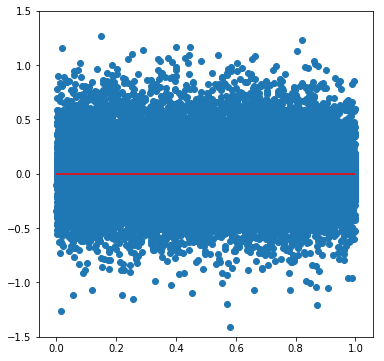

In [61]:
# plotting the residuals
plt.figure(figsize=(6, 6))
plt.scatter(np.linspace(0, 1, 21597), residuals)
plt.hlines(y=0, xmin=0, xmax=1, colors='r') 
plt.ylim(-1.5, 1.5)
plt.show()

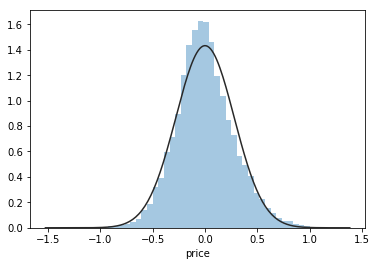

In [62]:
# plotting the distribution of the residuals with a normal curve overlay for comparison
sns.distplot(residuals, fit=norm, bins=50, kde=False);
plt.show()

## These are all good indications are model performed well
* The RMSE of our Model is low.  This means the price values predicted in our model are close to the observed values in our data
* The analysis of our residuals, or the variance of the predicticted price values from the actual values of price, are uniformly distributed across the model.  In fact they are very close to normally distributed as they should be in a good MLR fit.  There are some outliers but overall it appears our model is a good fit

In [63]:
df2['Predicted_Sales'] = y_vals # Put our predicted values in a dat frame with actual price values for comparison

## View of the first 15 data points ( Note the are the log transformed values)

In [64]:
df3 = df2.loc[:, ['price', 'Predicted_Sales']] # Show the comparison of actual and predicted sale prices
df3.head(15)

,price,Predicted_Sales
0,12.309982,12.656656
1,13.195614,13.299558
2,12.100712,12.658214
3,13.311329,12.787739
4,13.142166,13.132080
5,14.022525,14.122717
6,12.458775,12.516040
7,12.583995,12.452105
8,12.343658,12.748601
9,12.685408,12.650020


In [65]:
for column in ['price', 'Predicted_Sales']:   # convert our log transformed values back to dollar amounts
    df3[column] = round(np.exp(df3[column]))

## View of the first 15 data points converted back to dollar amounts

In [66]:
df3.head(15) # Comparison of actual price and predicted price in dollar amounts

,price,Predicted_Sales
0,221900.0,313846.0
1,538000.0,596932.0
2,180000.0,314335.0
3,604000.0,357803.0
4,510000.0,504882.0
5,1230000.0,1359621.0
6,257500.0,272676.0
7,291850.0,255788.0
8,229500.0,344070.0
9,323000.0,311770.0


# Results

After initially obtaining the data in our data set, we identified 6 areas of initial concern.  Two columns, date and id, were determined to be irrelevant to our analysis and were dropped from the data set.  We also identified 3 columns with missing data.  The goal when dealing with missing data is to maintain the overall integrity the original data set without losing information.  There are multiple strategies to approach this problem.  Imputing aggregate values, such as the median or mean, or replacing values based on their probability of occurrence in the data. Just to name a few. However, in each of the three cases of missing values in our data set each column contained mostly zeros.  The missing values in each case were replaced with zeros.  We examined the frequency of values after replacement and found the frequencies to be virtually the same as before replacement. This was the preferred method.  It maintained the original integrity of the data.  The sqft basement column was found to have 454 instances of a placeholder “?”.  This placeholder was removed and replaced by zeros.  This method was again chosen because it most closely replicated the distribution of values.  The Frequency of values was again checked and found to be very similar after replacement.  This column was then cast to a floating-point number data type so it could be used in our analysis.  Extensive exploratory data analysis was performed.  16 features were initially identified as the best possible predictors of price.  Several features, including the price target, were not normally distributed. These features were log transformed.  Resulting in more normal distributions. In line with the assumption required by our modeling technique. Through correlation analysis, several of our features were found to have a high degree of multicollinearity.  To address this redundancy two combined columns were created. One which combined the bedroom and bathroom features and one that combined the sqft above and sqft living features. Lat was also added to our features to be modeled.  Location is a key element in assessing real-estate price.  Lat was the location feature that had the most predictive power.  We began our modeling with all these features included. Through analysis of the results at each step features were eliminated.  After four iterations our predictive features were narrowed down to a set of five predictors. It was determined that lat, waterfront, view, grade and the sqft combined column produced the most predictive model.  

# Discussion 
* In this last iteration of our model our summary statistics describing our model look very much like one would want
* R-squared value of 0.720 is substantial for the complexity of our data. This means that 72% of the variability in price can be accounted for with the five predictor variables included in our model
* Our coefficients are all positive as would we hope in this case.  The magnitude of each coefficient represents the increase in price per unit change in the predictor if all other factors are held constant.  We were looking for features that predict increasing price as the values of the predictors increase.  A positive relationship between the two. Our coefficients indicate this relationship.
* The p-values of the features are all zero.  This indicates our feature variables are statistically significant predictors of price. Meaning that the observed relationship between predictor and price happened by chance alone is virtually zero
* Our statistics describing the normality assumptions of our model are close to ideal. The skewness, kurtosis and JB statistic are all within acceptable limits of the ideal. This was greatly enhanced by log transforming several of our features used in our model.
* The RMSE gives us an indication of how close our predicted values of y are to the actual values of y from the data. Lower values of RMSE incate better fit. Our RMSE was 0.72 incating a good fit.
* Our biggest concern for our model is the presence of multicollinearity. The condition number is a measure of this effect.  From the first iteration of our model to the final iteration the condition was decreased on a scale from 10^19 to 10^4.  This still indicates some degree of collinearity
* That being said, the predictive power of our model is still unchanged.  This only affects the granularity and precision in which you can describe the contribution of each predictor variable.  Each variable may have some combined redundant affects in the model.
* Our ultimate business objective was to produce a tool for projecting housing prices in King county, Washington.  The model is unaffected in this regard

# Conclusion

We have developed an MLR model for predicting house prices in King County, Washington.  Our model does a solid job of predicting house prices.  The metrics used to a evaluate a Multiple Linear Regression all point to a good model.  The R squared value of 0.72 is very reasonable for a complex data set like this one.  The RMSE value gives us an indication of how close our predicted values for price are to the actual values of price values in the data set. Lower RMSE scores indicate a better fitting model.  Our RMSE score of 0.72 indicates our model is a good fit. A residual is the distance an actual price point lies away from the predicting regression line.  In a model of good fit these should be evenly and normally distributed across all points.  Our model satisfies this criterion.  However, as can be seen in the brief comparison of original sale price with predicted sale prices in dollar amounts, many values are close to the original price but there are larger fluctuations in other values.  This will be more likely the farther the data point lies from the “middle” of the data set. There will naturally be some outliers in any data set.  These outliers will have less precise predictions.  Our business objective has been to develop a reliable tool that can be used to predict house prices in King County.  In hopes of developing a tool that can be used by buyers, sellers, agents and investors alike to get a fair estimation of property value in this area.  I think our model provides a very reasonable first step toward that goal.  It is not perfect by any measure.  But we are also confined by our data.  Our data is a small cross-section of data.  Our data includes only housing sale prices for one year between 2014 and 2015.  Real estate naturally fluctuates with market pressures.  More data over a longer time periods would greatly enhance our ability to model prices in this region.  Not surprisingly location is extremely important in forecasting real estate prices.  Latitude turned out to be our most important predictor of price.  The only other location information we were given in this data set were zip code and longitude.  Zip code and longitude, due to the numerical form they were presented in, provided little useful information in determining price.  We could obtain more data on location in a form more suitable for predictive analysis.  Instead of simple postal codes, we could rank the zip codes numerically corresponding to the neighborhoods with the highest housing prices. This also lends itself to geographical clustering of neighborhoods with the highest sale prices.  More powerful Machine learning algorithms could then be used to help predict price.  Our current model is a solid first step in the right direction.  With more data, more useful location data and the deployment of even more powerful predictive tools the business goal we set out to achieve, and the tool we set out to create are certainly within reach.

# Future Directions
* It is clearly evident location is extremely important in housing prices
* The map below provides clear evidence that prices are 'clustered' by area.  Especially areas of prime real estate have clusters of the highest price houses.
* This seems particularly well suited to more powerful clustering machine learning algoritms
* Our MLR technique tried to develop a model for predicting the entire region as a whole.  It is a strength of MLR but also one of its largest downfalls for this particular data set
* As can be seen below housing prices are clearly segmented into clusters depending on location
* A model that could create the clusters indicated on the map and then predict price within each of those clusters would provide superior predictive power.
* Here is where our zipcode information could really shine.  Cluster based price based on zipcode and then then create a model that predicts price within each cluster. Rather than agreagting all data and making predictions based on the whole data set.
* There are clearly different, very different, pockets of housing prices
* Predicting within those pockets, rather than predicting over the whole region, would clearly give better predictions
* I am excited to learn new machine learning techniques that can handle this problem more effectively

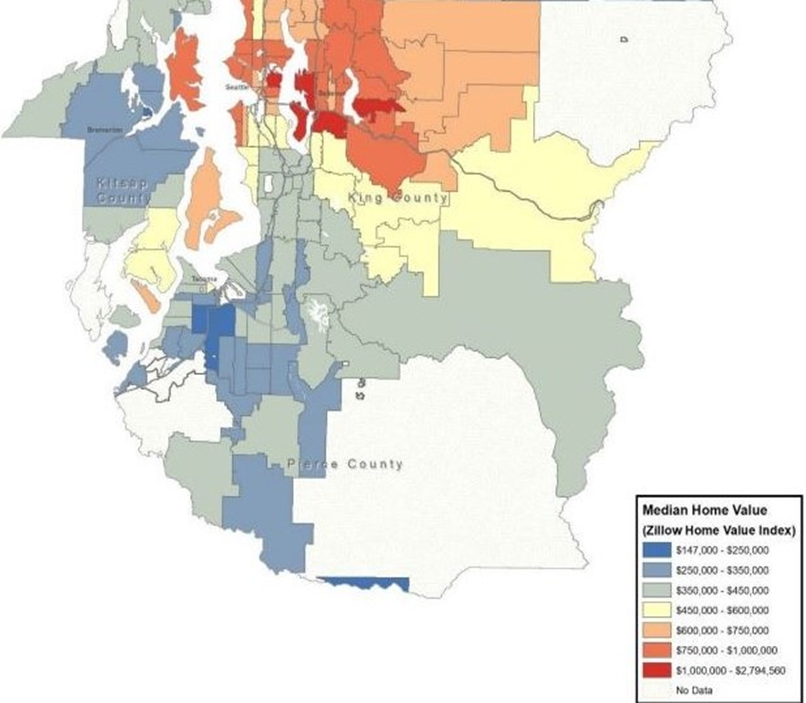